## Tensorflow Basics

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
sess = tf.InteractiveSession()

In [11]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Sample: 53456 Label: 5


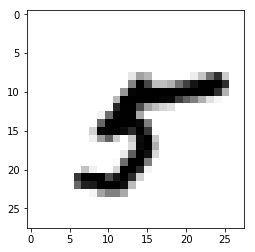

In [21]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(mnist.train.labels[num])
    label = mnist.train.labels[num].argmax(axis=0)
    image = mnist.train.images[num].reshape([28,28])
    print('\nSample: %d Label: %d'%(num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()

display_sample(53456)

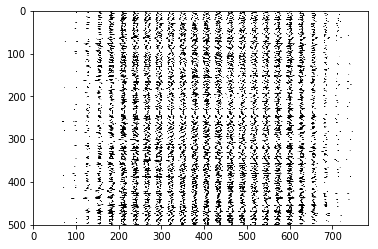

In [24]:
import numpy as np

images = mnist.train.images[0].reshape([1,784])
for i in range(1,501):
    images = np.concatenate((images,mnist.train.images[i].reshape([1,784])))
plt.imshow(images,cmap='gray_r')
plt.show()

In [35]:
input_images = tf.placeholder(tf.float32,shape=[None, 784])
target_labels = tf.placeholder(tf.float32,shape=[None, 10])

In [39]:
hidden_nodes = 512
input_weights = tf.Variable(tf.truncated_normal([784,hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes,10]))
hidden_biases = tf.Variable(tf.zeros([10]))                         

In [40]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights  = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [41]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [57]:
optimizer = tf.train.GradientDescentOptimizer(0.75).minimize(loss_function)

In [58]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1),tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [59]:
tf.global_variables_initializer().run()

for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1)%100==0):
        print("Training epoch ",x+1)
        print("Accuracy " +str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training epoch  100
Accuracy 0.8401
Training epoch  200
Accuracy 0.8635
Training epoch  300
Accuracy 0.875
Training epoch  400
Accuracy 0.8877
Training epoch  500
Accuracy 0.8896
Training epoch  600
Accuracy 0.9022
Training epoch  700
Accuracy 0.9085
Training epoch  800
Accuracy 0.9082
Training epoch  900
Accuracy 0.911
Training epoch  1000
Accuracy 0.9167
Training epoch  1100
Accuracy 0.9204
Training epoch  1200
Accuracy 0.9227
Training epoch  1300
Accuracy 0.9259
Training epoch  1400
Accuracy 0.9226
Training epoch  1500
Accuracy 0.9234
Training epoch  1600
Accuracy 0.9274
Training epoch  1700
Accuracy 0.9267
Training epoch  1800
Accuracy 0.929
Training epoch  1900
Accuracy 0.9321
Training epoch  2000
Accuracy 0.9261


Prediction 5 Actual 4


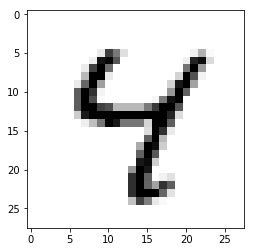

Prediction 3 Actual 9


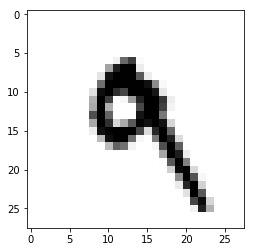

Prediction 6 Actual 5


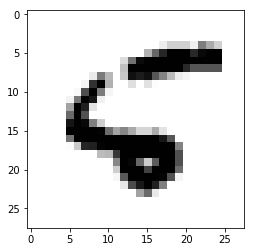

Prediction 3 Actual 5


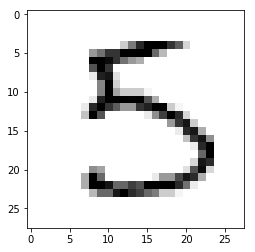

Prediction 3 Actual 5


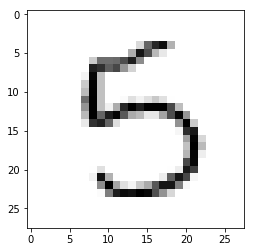

Prediction 5 Actual 9


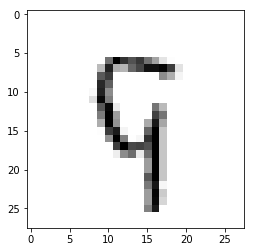

Prediction 9 Actual 1


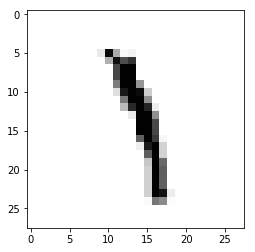

In [60]:
for x in range(100):
    x_train = mnist.test.images[x,:].reshape(1,784)
    y_train = mnist.test.labels[x,:]
    predictions = sess.run(digit_weights,feed_dict={input_images:x_train}).argmax()
    label = y_train.argmax()
    if(predictions!=label):
        print("Prediction %d Actual %d"%(predictions,label))
        plt.imshow(x_train.reshape(28,28),cmap='gray_r')
        plt.show()